In [74]:
import pandas as pd
import numpy as np

In [75]:
df=pd.read_csv("C:\\Users\\jojic\\OneDrive\\Desktop\\mljourney\\unsupervised-ml-works\\mall-casestudy\\Mall_Customers.csv.xls")

In [76]:
df.isnull().sum()

CustomerID                 0
Genre                      0
Age                        0
Annual Income (k$)         0
Spending Score (1-100)     0
dtype: int64

In [77]:
df[df.duplicated].shape

(0, 5)

In [78]:
df.shape

(200, 5)

In [79]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100) '],
      dtype='object')

In [80]:
x=df[['Annual Income (k$)','Spending Score (1-100)']]
x.head()

KeyError: "['Spending Score (1-100)'] not in index"

In [ ]:
x.shape

(200, 2)

In [ ]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,11):
    km=KMeans(random_state=1,n_clusters=i)
    km.fit(x)
    wcss.append(km.inertia_) #checking the best fit value for number of clusters in this data
print(wcss) 

[269981.28, 186362.95600651758, 154717.4200092758, 73880.64496247195, 44448.45544793371, 37558.92202302528, 30566.45113025186, 28531.71487782843, 26830.285722925368, 21749.333963862227]


In [ ]:
import matplotlib.pyplot as plt

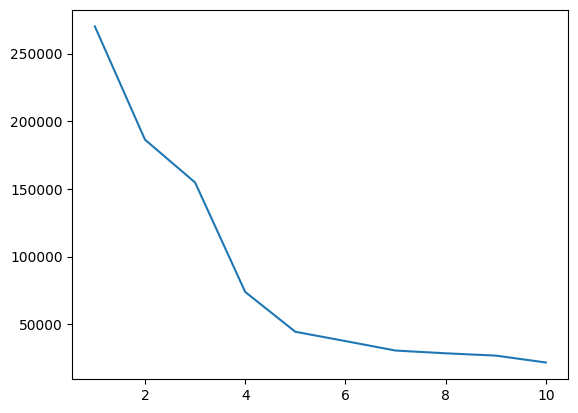

In [ ]:
plt.plot(range(1,11),wcss)

In [ ]:
from sklearn.cluster import KMeans
km=KMeans(random_state=1,n_clusters=5) #5 from elbow method, from the point of the steady bend 
y=km.fit_predict(x)
y

array([4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2,
       4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 2, 4, 0,
       4, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 1, 3, 0, 3, 1, 3, 1, 3,
       0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 0, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 3], dtype=int32)

In [ ]:
df["cluster"]=y

In [ ]:
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


In [81]:
from sklearn.metrics import silhouette_score 
#value should be greater than 0.5 - 1.0
print("silhouette_score : ",silhouette_score(x,y)) 

silhouette_score :  0.553931997444648
